In [703]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [704]:
df = pd.read_csv('train.csv')

In [705]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.42900,12058,355060,0.00000,0.00000,0.00000,99.02000,13,C,Urban,1
1,41492,0.01000,21546,315150,0.00000,0.00000,0.00000,99.89000,21,A,Urban,1
2,31300,0.91700,17531,84140,2.00000,3.00000,1.00000,98.69000,7,C,Rural,0
3,19415,0.04900,15341,250510,0.00000,0.00000,0.00000,99.57000,9,A,Urban,1
4,99379,0.05200,31400,198680,0.00000,0.00000,0.00000,99.87000,12,B,Urban,1


In [706]:
df.drop('id',axis=1,inplace=True)

In [707]:
df.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,0.42900,12058,355060,0.00000,0.00000,0.00000,99.02000,13,C,Urban,1
1,0.01000,21546,315150,0.00000,0.00000,0.00000,99.89000,21,A,Urban,1
2,0.91700,17531,84140,2.00000,3.00000,1.00000,98.69000,7,C,Rural,0
3,0.04900,15341,250510,0.00000,0.00000,0.00000,99.57000,9,A,Urban,1
4,0.05200,31400,198680,0.00000,0.00000,0.00000,99.87000,12,B,Urban,1


In [708]:
df.rename(columns={'perc_premium_paid_by_cash_credit':'perc_premium'},inplace=True)

In [709]:
df['age']=round(df['age_in_days']//365,2)

In [710]:
df.drop('age_in_days',axis=1,inplace=True)

<AxesSubplot:>

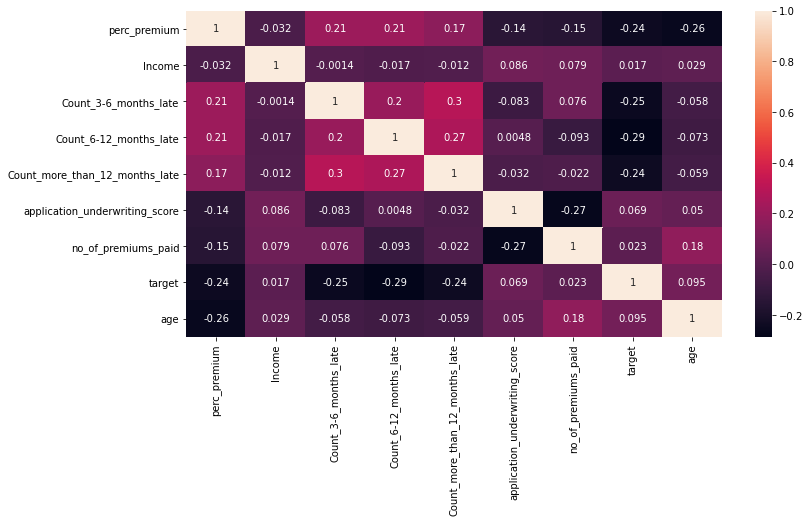

In [711]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [712]:
df.describe()

,perc_premium,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,age
count,79853.00000,79853.00000,79756.00000,79756.00000,79756.00000,76879.00000,79853.00000,79853.00000,79853.00000
mean,0.31429,208847.17118,0.24867,0.07819,0.06001,99.06729,10.86389,0.93741,51.60740
std,0.33491,496582.59726,0.69147,0.43651,0.31202,0.73980,5.17069,0.24223,14.27048
min,0.00000,24030.00000,0.00000,0.00000,0.00000,91.90000,2.00000,0.00000,21.00000
25%,0.03400,108010.00000,0.00000,0.00000,0.00000,98.81000,7.00000,1.00000,41.00000
50%,0.16700,166560.00000,0.00000,0.00000,0.00000,99.21000,10.00000,1.00000,51.00000
75%,0.53800,252090.00000,0.00000,0.00000,0.00000,99.54000,14.00000,1.00000,62.00000
max,1.00000,90262600.00000,13.00000,17.00000,11.00000,99.89000,60.00000,1.00000,103.00000


(array([ 4361.,  9953., 13973., 16612., 14700., 12073.,  5266.,  2265.,
          619.,    31.]),
 array([ 21. ,  29.2,  37.4,  45.6,  53.8,  62. ,  70.2,  78.4,  86.6,
         94.8, 103. ]),
 <BarContainer object of 10 artists>)

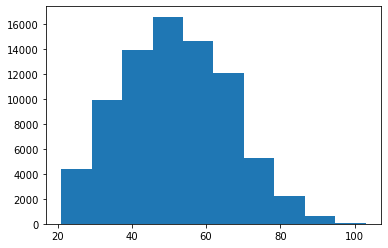

In [713]:
plt.hist(x='age',data=df)

<AxesSubplot:ylabel='age'>

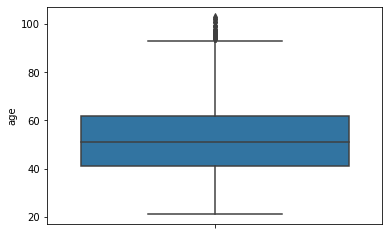

In [714]:
sns.boxplot(y=df.age,)

In [715]:
df['age'].describe(percentiles=[.99,.8,.7])

count   79853.00000
mean       51.60740
std        14.27048
min        21.00000
50%        51.00000
70%        59.00000
80%        64.00000
99%        86.00000
max       103.00000
Name: age, dtype: float64

In [716]:
upper_bound = 0.997
lower_bound = 0.1
res = df['age'].quantile([lower_bound, upper_bound])
print(res)

0.10000   33.00000
0.99700   90.00000
Name: age, dtype: float64


In [717]:
true_index = (df['age'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
79848    True
79849    True
79850    True
79851    True
79852    True
Name: age, Length: 79853, dtype: bool

In [718]:
false_index = ~true_index

In [719]:
df.loc[false_index, 'age'] = 90

In [720]:
df['age'].describe(percentiles=[.99,.8,.7])

count   79853.00000
mean       51.60104
std        14.25227
min        21.00000
50%        51.00000
70%        59.00000
80%        64.00000
99%        86.00000
max        90.00000
Name: age, dtype: float64

<AxesSubplot:ylabel='age'>

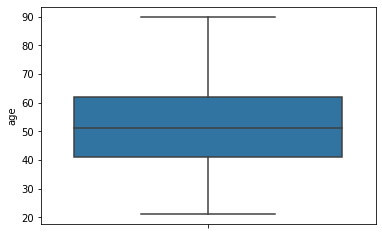

In [721]:
sns.boxplot(y=df.age,)

No Outlier in Age

In [722]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [723]:
df['Income'].describe(percentiles=[.997,.8,.7])

count      79853.00000
mean      208847.17118
std       496582.59726
min        24030.00000
50%       166560.00000
70%       231150.00000
80%       279030.00000
99.7%    1500110.00000
max     90262600.00000
Name: Income, dtype: float64

In [724]:
upper_bound = 0.997
lower_bound = 0.1
res = df['Income'].quantile([lower_bound, upper_bound])
print(res)

0.10000     71200.00000
0.99700   1500110.00000
Name: Income, dtype: float64


In [725]:
true_index = (df['Income'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
79848    True
79849    True
79850    True
79851    True
79852    True
Name: Income, Length: 79853, dtype: bool

In [726]:
false_index = ~true_index

In [727]:
df.loc[false_index, 'Income'] = 1500000.00000

In [728]:
df['Income'].describe(percentiles=[.997,.8,.7])

count     79853.00000
mean     201812.26566
std      154072.56222
min       24030.00000
50%      166560.00000
70%      231150.00000
80%      279030.00000
99.7%   1500000.00000
max     1500080.00000
Name: Income, dtype: float64

No Outlier in Income

In [729]:
df.head()

,perc_premium,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,0.42900,355060,0.00000,0.00000,0.00000,99.02000,13,C,Urban,1,33
1,0.01000,315150,0.00000,0.00000,0.00000,99.89000,21,A,Urban,1,59
2,0.91700,84140,2.00000,3.00000,1.00000,98.69000,7,C,Rural,0,48
3,0.04900,250510,0.00000,0.00000,0.00000,99.57000,9,A,Urban,1,42
4,0.05200,198680,0.00000,0.00000,0.00000,99.87000,12,B,Urban,1,86


In [730]:
df['age'] = pd.cut(df['age'],bins= [0,30,50,75,90],labels=[1,2,3,4])
df[['age', 'target']].groupby('age', as_index = False).count()

,age,target
0,1,5458
1,2,33396
2,3,36518
3,4,4481


In [731]:
df.head()

,perc_premium,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,0.42900,355060,0.00000,0.00000,0.00000,99.02000,13,C,Urban,1,2
1,0.01000,315150,0.00000,0.00000,0.00000,99.89000,21,A,Urban,1,3
2,0.91700,84140,2.00000,3.00000,1.00000,98.69000,7,C,Rural,0,2
3,0.04900,250510,0.00000,0.00000,0.00000,99.57000,9,A,Urban,1,2
4,0.05200,198680,0.00000,0.00000,0.00000,99.87000,12,B,Urban,1,4


<AxesSubplot:xlabel='age', ylabel='count'>

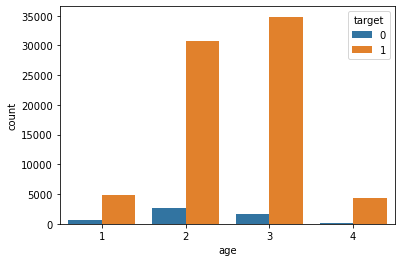

In [732]:
sns.countplot(x = 'age', data = df, hue = 'target')

In [733]:
df.value_counts(subset=['target','age'])

target  age
1       3      34825
        2      30773
        1       4878
        4       4379
0       2       2623
        3       1693
        1        580
        4        102
dtype: int64

In [734]:
df['Income'].describe()#percentiles=[.997,.8,.7])

count     79853.00000
mean     201812.26566
std      154072.56222
min       24030.00000
25%      108010.00000
50%      166560.00000
75%      252090.00000
max     1500080.00000
Name: Income, dtype: float64

In [735]:
df['Income'] = pd.qcut(df['Income'], 4,labels=[1,2,3,4,])
df[['Income', 'target']].groupby('Income', as_index = False).count()

,Income,target
0,1,19964
1,2,19966
2,3,19971
3,4,19952


In [736]:
df.head()

,perc_premium,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,0.42900,4,0.00000,0.00000,0.00000,99.02000,13,C,Urban,1,2
1,0.01000,4,0.00000,0.00000,0.00000,99.89000,21,A,Urban,1,3
2,0.91700,1,2.00000,3.00000,1.00000,98.69000,7,C,Rural,0,2
3,0.04900,3,0.00000,0.00000,0.00000,99.57000,9,A,Urban,1,2
4,0.05200,3,0.00000,0.00000,0.00000,99.87000,12,B,Urban,1,4


In [737]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [738]:
median=df.application_underwriting_score.median()

In [739]:
impute_nan(df,"application_underwriting_score",median)

In [740]:
df.isnull().sum()

perc_premium                                0
Income                                      0
Count_3-6_months_late                      97
Count_6-12_months_late                     97
Count_more_than_12_months_late             97
application_underwriting_score           2974
no_of_premiums_paid                         0
sourcing_channel                            0
residence_area_type                         0
target                                      0
age                                         0
application_underwriting_score_median       0
application_underwriting_score_random       0
dtype: int64

In [741]:
df.drop(['application_underwriting_score', 'application_underwriting_score_median'], axis = 1, inplace = True)

In [742]:
for data in [df]:
    data.loc[(data['Count_3-6_months_late'].isnull()),  'late_premium'] = np.NaN
    data.loc[(data['Count_3-6_months_late'].notnull()), 'late_premium'] = data['Count_3-6_months_late'] + data['Count_6-12_months_late'] + data['Count_more_than_12_months_late']
        

In [743]:
df.loc[(df['target'] == 0) & (df['late_premium'].isnull()),'late_premium'] = 7
df.loc[(df['target'] == 1) & (df['late_premium'].isnull()),'late_premium'] = 2

In [744]:
df.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

In [745]:
df.isnull().sum()

perc_premium                             0
Income                                   0
no_of_premiums_paid                      0
sourcing_channel                         0
residence_area_type                      0
target                                   0
age                                      0
application_underwriting_score_random    0
late_premium                             0
dtype: int64

In [746]:
df=pd.get_dummies(df,drop_first=True)

In [747]:
df.rename(columns={'application_underwriting_score_random':'application_underwriting_score'},inplace=True)

In [748]:
df.columns

Index(['perc_premium', 'no_of_premiums_paid', 'target',
       'application_underwriting_score', 'late_premium', 'Income_2',
       'Income_3', 'Income_4', 'sourcing_channel_B', 'sourcing_channel_C',
       'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Urban',
       'age_2', 'age_3', 'age_4'],
      dtype='object')

In [749]:
x=df.drop('target',axis=1)

In [750]:
y= df['target']

In [751]:
from imblearn.over_sampling import SMOTE
print('Number of positive and negative reviews:\n',y.value_counts())
sm = SMOTE(random_state=2)#,ratio=1.0)
X_train_res , y_train_res = sm.fit_resample(x,y)
print('Shape after oversampling\n',X_train_res.shape) 
print('Equal 1s and 0s \n', np.bincount(y_train_res))

Number of positive and negative reviews:
 1    74855
0     4998
Name: target, dtype: int64
Shape after oversampling
 (149710, 15)
Equal 1s and 0s 
 [74855 74855]


In [752]:
from sklearn.model_selection import train_test_split

In [753]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.4, random_state=101)

In [754]:
from sklearn.linear_model import LogisticRegression

In [755]:
lr = LogisticRegression()

In [756]:
lr.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\envs\loan\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [757]:
lr.score(X_train,y_train)

0.7663816712310467

In [758]:
y_pred = lr.predict(X_test)

In [759]:
acc_log = round(lr.score(X_train, y_train) * 100, 2)
print(acc_log)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(lr.predict(X_test),y_test)
print(cm)

print(classification_report(lr.predict(X_test),y_test))

76.64
[[21808  6028]
 [ 8215 23833]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75     27836
           1       0.80      0.74      0.77     32048

    accuracy                           0.76     59884
   macro avg       0.76      0.76      0.76     59884
weighted avg       0.76      0.76      0.76     59884



In [760]:
df1 = pd.read_csv('test.csv')

In [761]:
df1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.00100,27384,51150,0.00000,0.00000,0.00000,99.89000,7,A,Rural
1,81136,0.12400,23735,285140,0.00000,0.00000,0.00000,98.93000,19,A,Urban
2,70762,1.00000,17170,186030,0.00000,0.00000,0.00000,NaN,2,B,Urban
3,53935,0.19800,16068,123540,0.00000,0.00000,0.00000,99.00000,11,B,Rural
4,15476,0.04100,10591,200020,1.00000,0.00000,0.00000,99.17000,14,A,Rural


In [762]:
test_id=df1['id'].copy()

In [763]:
df1.drop('id',axis=1,inplace=True)

In [764]:
df1.rename(columns={'perc_premium_paid_by_cash_credit':'perc_premium'},inplace=True)

In [765]:
df1['age']=round(df1['age_in_days']//365,2)

In [766]:
df1.drop('age_in_days',axis=1,inplace=True)

In [767]:
df1.Income.describe()

count      34224.00000
mean      202820.12710
std       270253.60800
min        24030.00000
25%       106397.50000
50%       165070.00000
75%       250020.00000
max     21914550.00000
Name: Income, dtype: float64

In [768]:
upper_bound = 0.998
lower_bound = 0.1
res = df1['Income'].quantile([lower_bound, upper_bound])
print(res)

0.10000     71573.00000
0.99800   1507426.18000
Name: Income, dtype: float64


In [769]:
true_index = (df1['Income'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
34219    True
34220    True
34221    True
34222    True
34223    True
Name: Income, Length: 34224, dtype: bool

In [770]:
false_index = ~true_index

In [771]:
df1.loc[false_index, 'Income'] = 1500000.00000

In [772]:
df1.age.describe()

count   34224.00000
mean       51.54582
std        14.37412
min        21.00000
25%        41.00000
50%        51.00000
75%        62.00000
max        98.00000
Name: age, dtype: float64

In [773]:
df1['age'] = pd.cut(df1['age'],bins= [0,41,51,62,98],labels=[1,2,3,4])

In [774]:
df1.head()

,perc_premium,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,0.00100,51150,0.00000,0.00000,0.00000,99.89000,7,A,Rural,4
1,0.12400,285140,0.00000,0.00000,0.00000,98.93000,19,A,Urban,4
2,1.00000,186030,0.00000,0.00000,0.00000,NaN,2,B,Urban,2
3,0.19800,123540,0.00000,0.00000,0.00000,99.00000,11,B,Rural,2
4,0.04100,200020,1.00000,0.00000,0.00000,99.17000,14,A,Rural,1


In [775]:
df1.Income.describe()

count     34224.00000
mean     198523.24012
std      146861.55445
min       24030.00000
25%      106397.50000
50%      165070.00000
75%      250020.00000
max     1500130.00000
Name: Income, dtype: float64

In [776]:
df1['Income'] = pd.qcut(df1['Income'], 4,labels=[1,2,3,4,])

In [777]:
df1.head()

,perc_premium,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,0.00100,1,0.00000,0.00000,0.00000,99.89000,7,A,Rural,4
1,0.12400,4,0.00000,0.00000,0.00000,98.93000,19,A,Urban,4
2,1.00000,3,0.00000,0.00000,0.00000,NaN,2,B,Urban,2
3,0.19800,2,0.00000,0.00000,0.00000,99.00000,11,B,Rural,2
4,0.04100,3,1.00000,0.00000,0.00000,99.17000,14,A,Rural,1


In [778]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [779]:
median=df1.application_underwriting_score.median()

In [780]:
impute_nan(df1,"application_underwriting_score",median)

In [781]:
df1.isnull().sum()

perc_premium                                0
Income                                      0
Count_3-6_months_late                      31
Count_6-12_months_late                     31
Count_more_than_12_months_late             31
application_underwriting_score           1323
no_of_premiums_paid                         0
sourcing_channel                            0
residence_area_type                         0
age                                         0
application_underwriting_score_median       0
application_underwriting_score_random       0
dtype: int64

In [782]:
for data in [df1]:
    data.loc[(data['Count_3-6_months_late'].isnull()),  'late_premium'] = np.NaN
    data.loc[(data['Count_3-6_months_late'].notnull()), 'late_premium'] = data['Count_3-6_months_late'] + data['Count_6-12_months_late'] + data['Count_more_than_12_months_late']
        

In [783]:
guess_prem = np.zeros(4)
for dataset in [df1]:
    for i in range(1, 5):
        guess_df = dataset[(dataset['Income'] == i)]['late_premium'].dropna()

        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        premium_guess = guess_df.median()
        guess_prem[i - 1] = int(premium_guess) 
    for j in range(1, 5):
        dataset.loc[(dataset.late_premium.isnull()) & (dataset.Income == j), 'late_premium'] = guess_prem[j - 1] + 1

    dataset['late_premium'] = dataset['late_premium'].astype(int)

In [784]:
df1.isnull().sum()

perc_premium                                0
Income                                      0
Count_3-6_months_late                      31
Count_6-12_months_late                     31
Count_more_than_12_months_late             31
application_underwriting_score           1323
no_of_premiums_paid                         0
sourcing_channel                            0
residence_area_type                         0
age                                         0
application_underwriting_score_median       0
application_underwriting_score_random       0
late_premium                                0
dtype: int64

In [785]:
df1.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

In [786]:
df1.drop(['application_underwriting_score', 'application_underwriting_score_median'], axis = 1, inplace = True)

In [787]:
df1.rename(columns={'application_underwriting_score_random':'application_underwriting_score'},inplace=True)

In [788]:
df1=pd.get_dummies(df1,drop_first=True)

In [789]:
df1.columns

Index(['perc_premium', 'no_of_premiums_paid', 'application_underwriting_score',
       'late_premium', 'Income_2', 'Income_3', 'Income_4',
       'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D',
       'sourcing_channel_E', 'residence_area_type_Urban', 'age_2', 'age_3',
       'age_4'],
      dtype='object')

In [790]:
x_test = df1

In [791]:
result=lr.predict(x_test)

In [792]:
np.unique(result, return_counts=True)

(array([0, 1], dtype=int64), array([ 7866, 26358], dtype=int64))

In [793]:
dict = {'id':test_id ,'target':result}

In [794]:
sample = pd.DataFrame(dict)

In [795]:
#sample.to_csv('Loan.csv',index=False)